# Problem Statement

Predicting Heart disease using different Supervised Learning Models to find out which of these models are good at predicting having heart disease (positive) and not having heart disease (negative) cases correctly.

The data has collected on health profile parameters of people showing symptoms of heart disease and their diagnostic results are given in the Heart_Disease_Data file. The list of health profile features on which data is collected are given below:

- Age - Age
- Sex - Sex
- CP - Chest pain type 
- RestBP - Resting blood pressure
- Cholesterol - Serum cholesterol in mg/dl
- FBP - Fasting blood sugar > 120 mg/dl
- RestECG - Resting electrocardiographic results 
- Max_HR - Maximum heart rate achieved
- ExAngina - Exercise-induced angina
- Oldpeak - ST depression induced by exercise relative to rest
- Slope - The slope of the peak exercise ST segment
- CA - Number of major vessels (0-3) colored by flourosopy
- Thal - 3 = normal; 6 = fixed defect; 7 = reversible defect

# Work Flow

1. Data Collection -> Contains several health parameters which corresponds to person's healthiness of the heart
2. EDA -> to understand the insights of the data, what is this data all about and other such kind of things
3. Feature Engineering -> make the data compatiable to go into Machine Learning model
4. Data splitting -> training data & test data
5. Model Building -> Building the model and evaluating on training data
6. Model Evaluation -> Evaluating on Test data
7. Comparison -> Comparing different models to choose the best model for predicting the charges.
8. Building a predictive System

In [1]:
# importing the required libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.model_selection import train_test_split
from sklearn import metrics

# Data Collection

In [2]:
data = pd.read_excel('Heart_Disease_Data.xlsx')
data.head()

,Age,Sex,CP,RestBP,Cholesteral,FBP,RestECG,Max_HR,ExAngina,Oldpeak,Slope,CA,Thal,Result
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [3]:
data.tail()

,Age,Sex,CP,RestBP,Cholesteral,FBP,RestECG,Max_HR,ExAngina,Oldpeak,Slope,CA,Thal,Result
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [4]:
data.shape

(303, 14)

# EDA

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          303 non-null    int64  
 1   Sex          303 non-null    int64  
 2   CP           303 non-null    int64  
 3   RestBP       303 non-null    int64  
 4   Cholesteral  303 non-null    int64  
 5   FBP          303 non-null    int64  
 6   RestECG      303 non-null    int64  
 7   Max_HR       303 non-null    int64  
 8   ExAngina     303 non-null    int64  
 9   Oldpeak      303 non-null    float64
 10  Slope        303 non-null    int64  
 11  CA           303 non-null    int64  
 12  Thal         303 non-null    int64  
 13  Result       303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [6]:
# checking for missing values in the dataset
data.isnull().sum()

Age            0
Sex            0
CP             0
RestBP         0
Cholesteral    0
FBP            0
RestECG        0
Max_HR         0
ExAngina       0
Oldpeak        0
Slope          0
CA             0
Thal           0
Result         0
dtype: int64

In [7]:
# Statistical measures of the dataset
data.describe()

,Age,Sex,CP,RestBP,Cholesteral,FBP,RestECG,Max_HR,ExAngina,Oldpeak,Slope,CA,Thal,Result
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [8]:
data.Result.value_counts()

1    165
0    138
Name: Result, dtype: int64

Here, both the categories are almost equal. Hence, it is a balanced dataset.

**Numerical Variables**

In [9]:
# list of numerical variables
numerical_features = [feature for feature in data.columns if data[feature].dtypes != 'O']

print('Number of numerical variables: ', len(numerical_features))

# visualise the numerical variables
data[numerical_features].head()

Number of numerical variables:  14


,Age,Sex,CP,RestBP,Cholesteral,FBP,RestECG,Max_HR,ExAngina,Oldpeak,Slope,CA,Thal,Result
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


Numerical variables are usually of 2 type

**1.Discrete Variables**

In [10]:
discrete_feature = [feature for feature in numerical_features if len(data[feature].unique())<25 ]
print("Discrete Variables Count: {}".format(len(discrete_feature)))

Discrete Variables Count: 9


In [11]:
discrete_feature

['Sex', 'CP', 'FBP', 'RestECG', 'ExAngina', 'Slope', 'CA', 'Thal', 'Result']

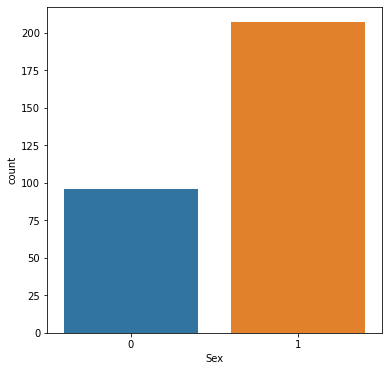

In [12]:
# distribution of Sex values

plt.figure(figsize=(6,6))
sb.countplot(x='Sex', data=data)
plt.show()

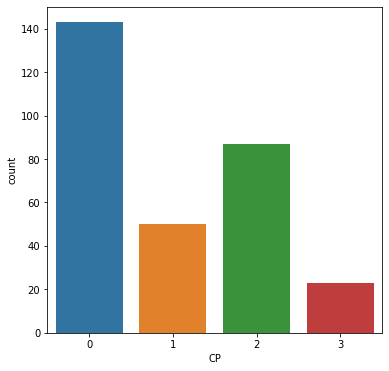

In [13]:
# distribution of CP values

plt.figure(figsize=(6,6))
sb.countplot(x='CP', data=data)
plt.show()

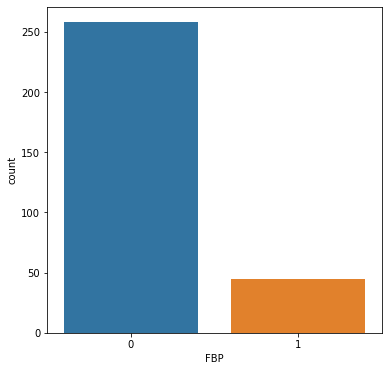

In [14]:
# distribution of FBP values

plt.figure(figsize=(6,6))
sb.countplot(x='FBP', data=data)
plt.show()

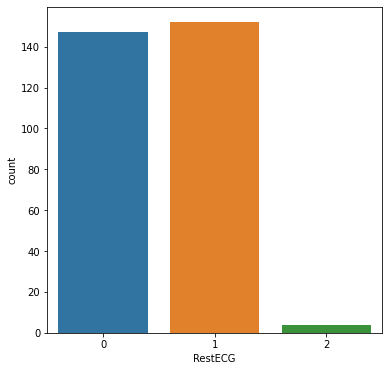

In [15]:
# distribution of RestECG values

plt.figure(figsize=(6,6))
sb.countplot(x='RestECG', data=data)
plt.show()

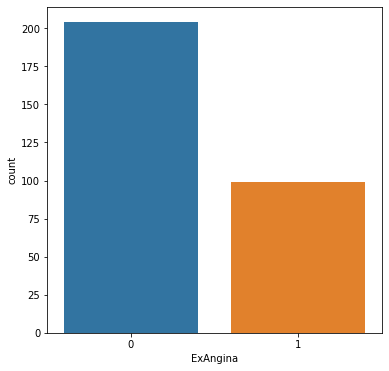

In [16]:
# distribution of ExAngina values

plt.figure(figsize=(6,6))
sb.countplot(x='ExAngina', data=data)
plt.show()

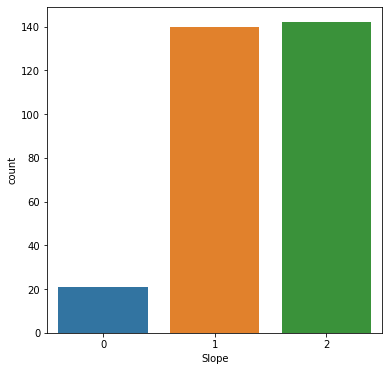

In [17]:
# distribution of Slope values

plt.figure(figsize=(6,6))
sb.countplot(x='Slope', data=data)
plt.show()

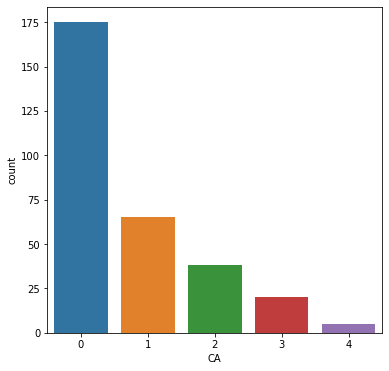

In [18]:
# distribution of CA values

plt.figure(figsize=(6,6))
sb.countplot(x='CA', data=data)
plt.show()

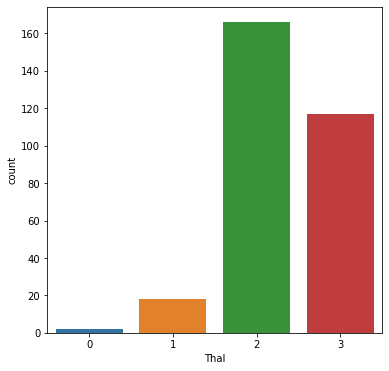

In [19]:
# distribution of Thal values

plt.figure(figsize=(6,6))
sb.countplot(x='Thal', data=data)
plt.show()

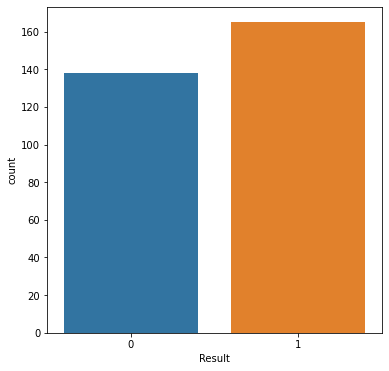

In [20]:
# distribution of Result values

plt.figure(figsize=(6,6))
sb.countplot(x='Result', data=data)
plt.show()

**2.Continous variables**

In [21]:
continuous_feature = [feature for feature in numerical_features if feature not in discrete_feature]
print("Continuous feature Count: {}".format(len(continuous_feature)))

Continuous feature Count: 5


In [22]:
continuous_feature

['Age', 'RestBP', 'Cholesteral', 'Max_HR', 'Oldpeak']

C:\Users\K.KALYANKUMAR\Downloads\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


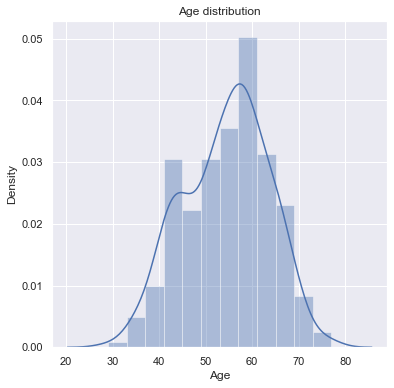

In [23]:
# distribution of Age values

sb.set()
plt.figure(figsize=(6,6))
sb.distplot(data.Age)
plt.title('Age distribution')
plt.show()

C:\Users\K.KALYANKUMAR\Downloads\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


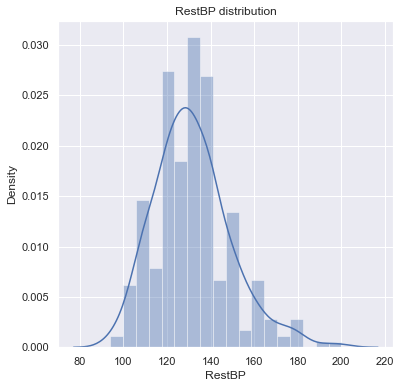

In [24]:
# distribution of RestBP values

sb.set()
plt.figure(figsize=(6,6))
sb.distplot(data.RestBP)
plt.title('RestBP distribution')
plt.show()

C:\Users\K.KALYANKUMAR\Downloads\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


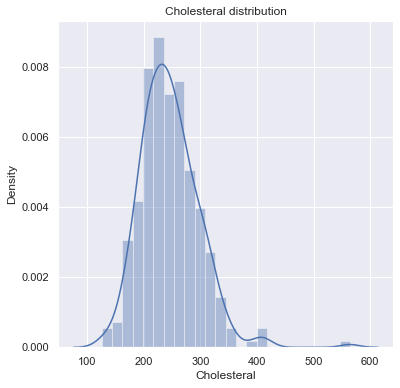

In [25]:
# distribution of Cholesteral values

sb.set()
plt.figure(figsize=(6,6))
sb.distplot(data.Cholesteral)
plt.title('Cholesteral distribution')
plt.show()

C:\Users\K.KALYANKUMAR\Downloads\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


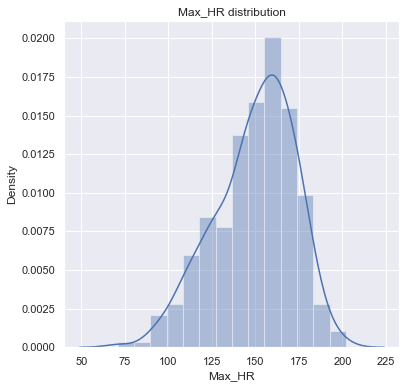

In [26]:
# distribution of Max_HR values

sb.set()
plt.figure(figsize=(6,6))
sb.distplot(data.Max_HR)
plt.title('Max_HR distribution')
plt.show()

C:\Users\K.KALYANKUMAR\Downloads\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


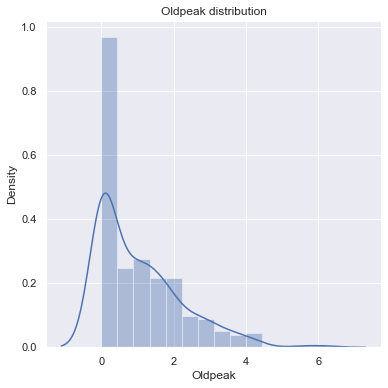

In [27]:
# distribution of Oldpeak values

sb.set()
plt.figure(figsize=(6,6))
sb.distplot(data.Oldpeak)
plt.title('Oldpeak distribution')
plt.show()

**Outliers**

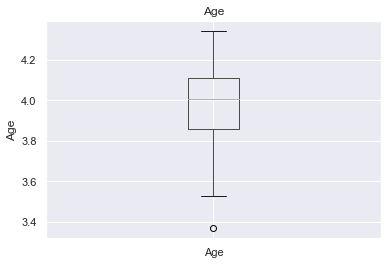

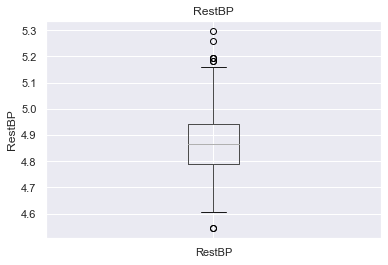

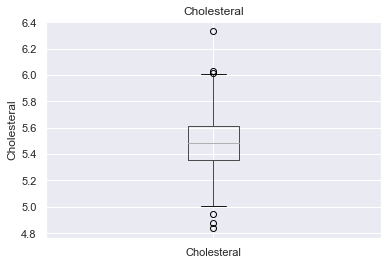

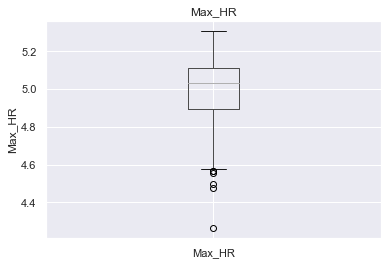

In [28]:
# only for continuous features
for feature in continuous_feature:
    df = data.copy()
    if 0 in df[feature].unique():
        pass
    else:
        df[feature]=np.log(df[feature])
        df.boxplot(column=feature)
        plt.ylabel(feature)
        plt.title(feature)
        plt.show()

# Feature Engineering

**Feature Selection**

In [29]:
x = data.iloc[:,:-1]
y = data.Result

In [30]:
x.head()

,Age,Sex,CP,RestBP,Cholesteral,FBP,RestECG,Max_HR,ExAngina,Oldpeak,Slope,CA,Thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [31]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: Result, dtype: int64

**Feature importance**

In [32]:
from sklearn.ensemble import ExtraTreesClassifier

model = ExtraTreesClassifier().fit(x,y)
model.feature_importances_

array([0.07071617, 0.05657701, 0.13710448, 0.05901403, 0.05965415,
       0.02141161, 0.0337823 , 0.083965  , 0.09343572, 0.08809774,
       0.07093222, 0.12187132, 0.10343825])

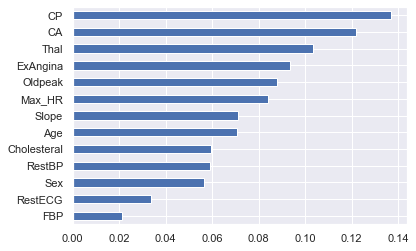

In [33]:
ranked_features = pd.Series(model.feature_importances_, index=x.columns)
ranked_features.sort_values().plot(kind='barh')
plt.show()

**Correlation**

In [34]:
x.corr()

,Age,Sex,CP,RestBP,Cholesteral,FBP,RestECG,Max_HR,ExAngina,Oldpeak,Slope,CA,Thal
Age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001
Sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041
CP,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736
RestBP,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210
Cholesteral,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803
FBP,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019
RestECG,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981
Max_HR,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439
ExAngina,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754
Oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244


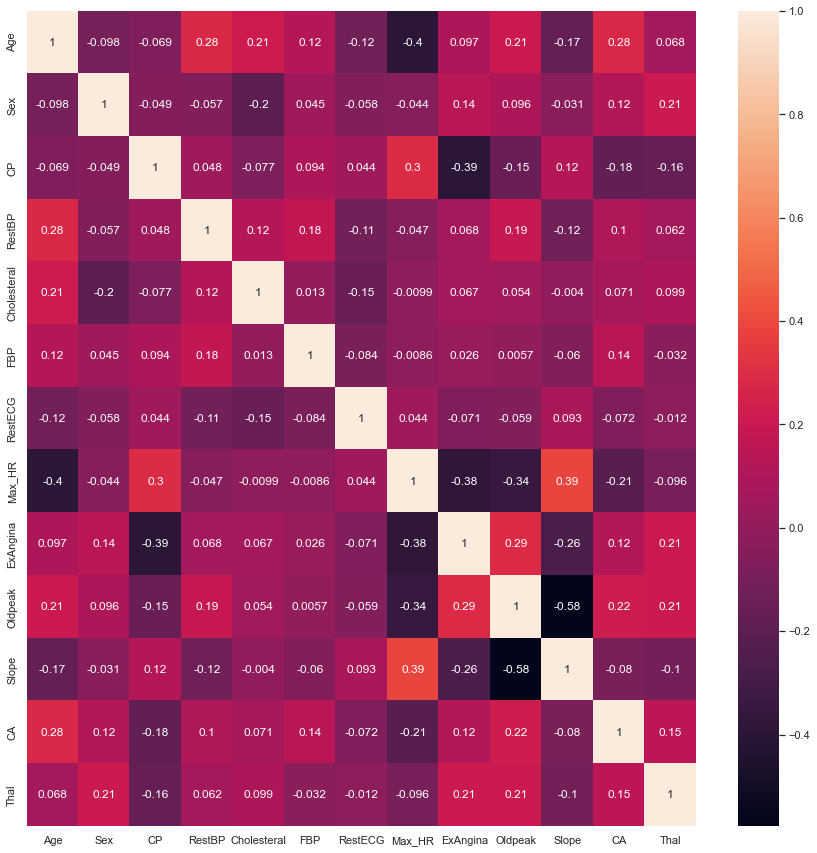

In [35]:
plt.figure(figsize=(15,15))
sb.heatmap(x.corr(), annot=True)
plt.show()

In [36]:
# lets remove the highly correlated features

# find and remove correlated features
def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

In [37]:
correlation(x,0.7)

set()

As no multicollinearity exists, we will proceed further

# Data Splitting

In [38]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, stratify=y, random_state=2)

print(x.shape, x_train.shape, x_test.shape)

(303, 13) (242, 13) (61, 13)


# Logistic Regression

**Model Building**

In [39]:
# loading the logistic regression model
from sklearn.linear_model import LogisticRegression

log_model  = LogisticRegression().fit(x_train, y_train)

C:\Users\K.KALYANKUMAR\Downloads\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [40]:
# accuracy of training data
from sklearn.metrics import accuracy_score

x_train_pred = log_model.predict(x_train)
training_accuracy = accuracy_score(x_train_pred, y_train)
training_accuracy

0.8512396694214877

**Model Evaluation**

Evaluation Metrics

- Accuracy Score – no. of correctly classified instances/total no. of instances
- Precision Score – the ratio of correctly predicted instances over total positive instances
- Recall Score – the ratio of correctly predicted instances over total instances in that class
- Roc Curve – a plot of true positive rate against false positive rate
- Confusion Matrix – a table used to describe the classification models

In [41]:
# accuracy of test data

x_test_pred = log_model.predict(x_test)
test_accuracy = accuracy_score(x_test_pred, y_test)
test_accuracy

0.819672131147541

In [42]:
# confusion matrix
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, x_test_pred)

array([[23,  5],
       [ 6, 27]], dtype=int64)

In [43]:
# import accuracy_score, precision_score, recall_score, f1_score from scikit-learn
from sklearn.metrics import precision_score, recall_score, f1_score

# Computing the accuracy, precision, recall and F1 scores of the model using your test data 'y_test' 
print('Accuracy score: ', format(accuracy_score(y_test, x_test_pred)))
print('Precision score: ', format(precision_score(y_test, x_test_pred)))
print('Recall score: ', format(recall_score(y_test, x_test_pred)))
print('F1 score: ', format(f1_score(y_test, x_test_pred)))

Accuracy score:  0.819672131147541
Precision score:  0.84375
Recall score:  0.8181818181818182
F1 score:  0.8307692307692308


**ROC Curve**

In [44]:
# probability of the class using the predict_proba()
from sklearn.metrics import roc_auc_score

predictions_probability = log_model.predict_proba(x_test)
print("roc_auc_score: ",format(roc_auc_score(y_test, predictions_probability[:,1])))

roc_auc_score:  0.8906926406926408


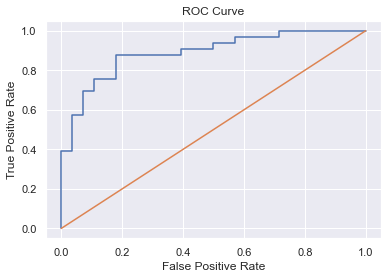

In [45]:
# ROC Curve
from sklearn.metrics import roc_curve

fpr,tpr,thresholds = roc_curve(y_test, predictions_probability[:,1])
plt.plot(fpr,tpr)
plt.plot([0,1])
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

As we can see that our Logistic Regression model performed good in classifying the Result as having heart disease or not, with an Accuracy score, Precision and Recall of approx **82%**. And the roc curve and confusion matrix are great as well which means that our model is able to classify the labels accurately, with fewer chances of error.

# Decision Tree Classifier

**Model Building**

In [46]:
# importing the Decision Tree classifier
from sklearn.tree import DecisionTreeClassifier

# Create the classifier
model_tree = DecisionTreeClassifier()

# fit the training data into the classifier
model_tree.fit(x_train, y_train)

pred_train_tree = model_tree.predict(x_train)
training_accuracy_tree = accuracy_score(pred_train_tree, y_train)
training_accuracy_tree

1.0

In [47]:
# optimizing model parameters
from sklearn.model_selection import GridSearchCV   

parameters = [{'criterion':['gini','entropy']}]
search = GridSearchCV(model_tree, parameters, scoring='accuracy', cv=5, verbose=True, n_jobs=-1).fit(x_train, y_train)

Fitting 5 folds for each of 2 candidates, totalling 10 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    2.6s finished


In [48]:
# optimum parameter values
search.best_params_

{'criterion': 'entropy'}

In [49]:
model_tree = DecisionTreeClassifier(criterion='entropy').fit(x_train, y_train)

In [50]:
# accuracy of training data

pred_train_tree = model_tree.predict(x_train)
training_accuracy_tree = accuracy_score(pred_train_tree, y_train)
training_accuracy_tree

1.0

**Model Evaluation**

In [51]:
# accuracy of test data

pred_test_tree = model_tree.predict(x_test)
test_accuracy_tree = accuracy_score(pred_test_tree, y_test)
test_accuracy_tree

0.7377049180327869

In [52]:
# confusion matrix
confusion_matrix(y_test, pred_test_tree)

array([[21,  7],
       [ 9, 24]], dtype=int64)

In [53]:
# Computing the accuracy, precision, recall and F1 scores of the model using your test data 'y_test' 
print('Accuracy score: ', format(accuracy_score(y_test, pred_test_tree)))
print('Precision score: ', format(precision_score(y_test, pred_test_tree)))
print('Recall score: ', format(recall_score(y_test, pred_test_tree)))
print('F1 score: ', format(f1_score(y_test, pred_test_tree)))

Accuracy score:  0.7377049180327869
Precision score:  0.7741935483870968
Recall score:  0.7272727272727273
F1 score:  0.7500000000000001


**ROC Curve**

In [54]:
# probability of the class using the predict_proba()
predictions_probability = model_tree.predict_proba(x_test)
print("roc_auc_score: ",format(roc_auc_score(y_test, predictions_probability[:,1])))

roc_auc_score:  0.7386363636363636


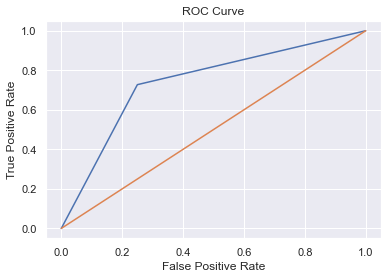

In [55]:
# ROC Curve
fpr,tpr,thresholds = roc_curve(y_test, predictions_probability[:,1])
plt.plot(fpr,tpr)
plt.plot([0,1])
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

As we can see that our Decision Tree Classifier model is good in classifying the Result as having heart disease or not, with an Accuracy score, Precision and Recall of approx **74%**. And the roc curve and confusion matrix are also good as well, which means that  Decision Tree model is able to classify the labels accurately, with fewer chances of error.

# Random Forest

**Model Building**

In [56]:
# importing the Random Forest classifier
from sklearn.ensemble import RandomForestClassifier

# Create the classifier
model_rf = RandomForestClassifier(n_estimators=500, max_features='sqrt')

# fit the training data into the classifier
model_rf.fit(x_train, y_train)

pred_train_rf = model_rf.predict(x_train)
training_accuracy_rf = accuracy_score(pred_train_rf, y_train)
training_accuracy_rf

1.0

In [57]:
# optimizing model parameters

parameters = [{'criterion':['gini','entropy'], 'n_estimators':[100,200,300,400,500,600]}]
search = GridSearchCV(model_rf, parameters, scoring='accuracy', cv=5, verbose=True, n_jobs=-1).fit(x_train, y_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   15.0s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:   24.9s finished


In [58]:
# optimum parameter values
search.best_params_

{'criterion': 'gini', 'n_estimators': 400}

In [59]:
model_rf = RandomForestClassifier(criterion='gini', n_estimators=400, max_features='sqrt').fit(x_train, y_train)

In [60]:
# accuracy of training data

pred_train_rf = model_rf.predict(x_train)
training_accuracy_rf = accuracy_score(pred_train_rf, y_train)
training_accuracy_rf

1.0

**Model Evaluation**

In [61]:
# accuracy of test data

pred_test_rf = model_rf.predict(x_test)
test_accuracy_rf = accuracy_score(pred_test_rf, y_test)
test_accuracy_rf

0.7704918032786885

In [62]:
# confusion matrix
confusion_matrix(y_test, pred_test_rf)

array([[22,  6],
       [ 8, 25]], dtype=int64)

In [63]:
# Computing the accuracy, precision, recall and F1 scores of the model using your test data 'y_test' 
print('Accuracy score: ', format(accuracy_score(y_test, pred_test_rf)))
print('Precision score: ', format(precision_score(y_test, pred_test_rf)))
print('Recall score: ', format(recall_score(y_test, pred_test_rf)))
print('F1 score: ', format(f1_score(y_test, pred_test_rf)))

Accuracy score:  0.7704918032786885
Precision score:  0.8064516129032258
Recall score:  0.7575757575757576
F1 score:  0.7812499999999999


**ROC Curve**

In [64]:
# probability of the class using the predict_proba()
predictions_probability = model_rf.predict_proba(x_test)
print("roc_auc_score: ",format(roc_auc_score(y_test, predictions_probability[:,1])))

roc_auc_score:  0.8809523809523809


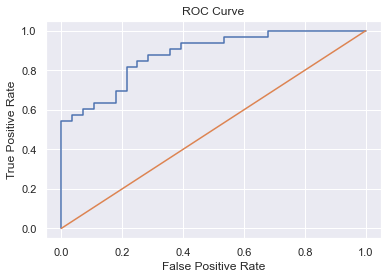

In [65]:
# ROC Curve
fpr,tpr,thresholds = roc_curve(y_test, predictions_probability[:,1])
plt.plot(fpr,tpr)
plt.plot([0,1])
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

As we can see that our Random Forest Classifier model performed good in classifying the Result as having heart disease or not, with an Accuracy score, Precision and Recall of approx **77%**. And the roc curve and confusion matrix are Ok as well, which means that Random Forest model is able to classify the labels accurately, with fewer chances of error.

# Bagging

**Model Building**

In [66]:
# Create the classifier
model_bag = RandomForestClassifier(n_estimators=500, max_features=None)

# fit the training data into the classifier
model_bag.fit(x_train, y_train)

pred_train_bag = model_bag.predict(x_train)
training_accuracy_bag = accuracy_score(pred_train_bag, y_train)
training_accuracy_bag

1.0

In [67]:
# optimizing model parameters

parameters = [{'criterion':['gini','entropy'], 'n_estimators':[100,200,300,400,500,600]}]
search = GridSearchCV(model_bag, parameters, scoring='accuracy', cv=5, verbose=True, n_jobs=-1).fit(x_train, y_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   16.3s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:   27.6s finished


In [68]:
# optimum parameter values
search.best_params_

{'criterion': 'entropy', 'n_estimators': 100}

In [69]:
model_bag = RandomForestClassifier(criterion='entropy', n_estimators=100, max_features=None).fit(x_train, y_train)

In [70]:
# accuracy of training data

pred_train_bag = model_bag.predict(x_train)
training_accuracy_bag = accuracy_score(pred_train_bag, y_train)
training_accuracy_bag

1.0

**Model Evaluation**

In [71]:
# accuracy of test data

pred_test_bag = model_bag.predict(x_test)
test_accuracy_bag = accuracy_score(pred_test_bag, y_test)
test_accuracy_bag

0.7540983606557377

In [72]:
# confusion matrix
confusion_matrix(y_test, pred_test_bag)

array([[20,  8],
       [ 7, 26]], dtype=int64)

In [73]:
# Computing the accuracy, precision, recall and F1 scores of the model using your test data 'y_test' 
print('Accuracy score: ', format(accuracy_score(y_test, pred_test_bag)))
print('Precision score: ', format(precision_score(y_test, pred_test_bag)))
print('Recall score: ', format(recall_score(y_test, pred_test_bag)))
print('F1 score: ', format(f1_score(y_test, pred_test_bag)))

Accuracy score:  0.7540983606557377
Precision score:  0.7647058823529411
Recall score:  0.7878787878787878
F1 score:  0.7761194029850745


**ROC Curve**

In [74]:
# probability of the class using the predict_proba()
predictions_probability = model_bag.predict_proba(x_test)
print("roc_auc_score: ",format(roc_auc_score(y_test, predictions_probability[:,1])))

roc_auc_score:  0.8544372294372297


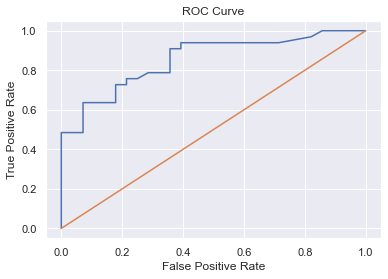

In [75]:
# ROC Curve
fpr,tpr,thresholds = roc_curve(y_test, predictions_probability[:,1])
plt.plot(fpr,tpr)
plt.plot([0,1])
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

As we can see that our Bagging model performed good in classifying the Result as having heart disease or not, with an Accuracy score, Precision and Recall of approx **75%**. And the roc curve and confusion matrix are Ok as well, which means that Bagging model is able to classify the labels accurately, with fewer chances of error.

# K Nearest Neighbours

**Model Building**

In [76]:
# importing the K neighbors classifier
from sklearn.neighbors import KNeighborsClassifier

# Create the classifier
model_knn = KNeighborsClassifier(n_neighbors=5)

# fit the training data into the classifier
model_knn.fit(x_train, y_train)

pred_train_knn = model_knn.predict(x_train)
training_accuracy_knn = accuracy_score(pred_train_knn, y_train)
training_accuracy_knn

0.78099173553719

In [77]:
# hyperparameter tuning
from sklearn.model_selection import GridSearchCV 

parameters = [{'n_neighbors':[3,4,5,6,7,8,9,10,11,12,13,14,15]}]
search = GridSearchCV(model_knn, parameters, scoring='accuracy', cv=5, verbose=True).fit(x_train,y_train)

Fitting 5 folds for each of 13 candidates, totalling 65 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  65 out of  65 | elapsed:    0.7s finished


In [78]:
# optimum parameter values
search.best_params_

{'n_neighbors': 5}

In [79]:
model_knn = KNeighborsClassifier(n_neighbors=5).fit(x_train, y_train)

In [80]:
# accuracy of training data

pred_train_knn = model_knn.predict(x_train)
training_accuracy_knn = accuracy_score(pred_train_knn, y_train)
training_accuracy_knn

0.78099173553719

**Model Evaluation**

In [81]:
# accuracy of test data

pred_test_knn = model_knn.predict(x_test)
test_accuracy_knn = accuracy_score(pred_test_knn, y_test)
test_accuracy_knn

0.6229508196721312

In [82]:
# confusion matrix
confusion_matrix(y_test, pred_test_knn)

array([[16, 12],
       [11, 22]], dtype=int64)

In [83]:
# Computing the accuracy, precision, recall and F1 scores of the model using your test data 'y_test' 
print('Accuracy score: ', format(accuracy_score(y_test, pred_test_knn)))
print('Precision score: ', format(precision_score(y_test, pred_test_knn)))
print('Recall score: ', format(recall_score(y_test, pred_test_knn)))
print('F1 score: ', format(f1_score(y_test, pred_test_knn)))

Accuracy score:  0.6229508196721312
Precision score:  0.6470588235294118
Recall score:  0.6666666666666666
F1 score:  0.6567164179104478


**ROC Curve**

In [84]:
# probability of the class using the predict_proba()
predictions_probability = model_knn.predict_proba(x_test)
print("roc_auc_score: ",format(roc_auc_score(y_test, predictions_probability[:,1])))

roc_auc_score:  0.6374458874458874


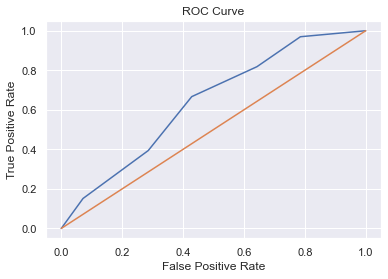

In [85]:
# ROC Curve
fpr,tpr,thresholds = roc_curve(y_test, predictions_probability[:,1])
plt.plot(fpr,tpr)
plt.plot([0,1])
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

As we can see that our KNN Classifier model not performed well in classifying the Result as having heart disease or not, with an Accuracy score, Precision and Recall of approx **62%**. And the roc curve and confusion matrix are not good as well which means that our model is not able to classify the labels accurately.

# Support Vector Machine

**Model Building**

In [86]:
# Loading Support Vector Machine Model
from sklearn import svm

model_svm = svm.SVC(kernel='linear').fit(x_train,y_train)

In [87]:
# accuracy of training data

x_train_svm = model_svm.predict(x_train)
training_accuracy_svm = accuracy_score(x_train_svm, y_train)
training_accuracy_svm

0.8553719008264463

**Model Evaluation**

In [88]:
# accuracy of test data

x_test_svm = model_svm.predict(x_test)
test_accuracy_svm = accuracy_score(x_test_svm, y_test)
test_accuracy_svm

0.819672131147541

In [89]:
# confusion matrix
confusion_matrix(y_test, x_test_svm)

array([[21,  7],
       [ 4, 29]], dtype=int64)

In [90]:
# Computing the accuracy, precision, recall and F1 scores of the model using your test data 'y_test' 
print('Accuracy score: ', format(accuracy_score(y_test, x_test_svm)))
print('Precision score: ', format(precision_score(y_test, x_test_svm)))
print('Recall score: ', format(recall_score(y_test, x_test_svm)))
print('F1 score: ', format(f1_score(y_test, x_test_svm)))

Accuracy score:  0.819672131147541
Precision score:  0.8055555555555556
Recall score:  0.8787878787878788
F1 score:  0.8405797101449276


As we can see that our SVM Classifier model performed good in classifying the Result as having heart disease or not, with an Accuracy score, Precision and Recall of approx **82%**.

# Naive Bayes 

**Model Building**

In [91]:
# Loading Naive Bayes Model
from sklearn.naive_bayes import GaussianNB

model_naive = GaussianNB().fit(x_train,y_train)

In [92]:
# accuracy of training data

x_train_nb = model_naive.predict(x_train)
training_accuracy_nb = accuracy_score(x_train_nb, y_train)
training_accuracy_nb

0.8471074380165289

**Model Evaluation**

In [93]:
# accuracy of test data

x_test_nb = model_naive.predict(x_test)
test_accuracy_nb = accuracy_score(x_test_nb, y_test)
test_accuracy_nb

0.819672131147541

In [94]:
# confusion matrix
confusion_matrix(y_test, x_test_nb)

array([[25,  3],
       [ 8, 25]], dtype=int64)

In [95]:
# Computing the accuracy, precision, recall and F1 scores of the model using your test data 'y_test' 
print('Accuracy score: ', format(accuracy_score(y_test, x_test_nb)))
print('Precision score: ', format(precision_score(y_test, x_test_nb)))
print('Recall score: ', format(recall_score(y_test, x_test_nb)))
print('F1 score: ', format(f1_score(y_test, x_test_nb)))

Accuracy score:  0.819672131147541
Precision score:  0.8928571428571429
Recall score:  0.7575757575757576
F1 score:  0.819672131147541


**ROC Curve**

In [96]:
# probability of the class using the predict_proba()
predictions_probability = model_naive.predict_proba(x_test)
print("roc_auc_score: ",format(roc_auc_score(y_test, predictions_probability[:,1])))

roc_auc_score:  0.8961038961038962


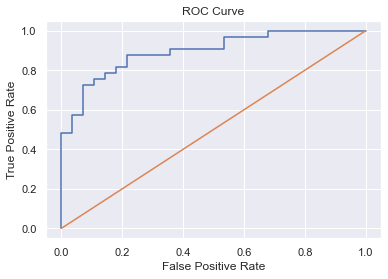

In [97]:
# ROC Curve
fpr,tpr,thresholds = roc_curve(y_test, predictions_probability[:,1])
plt.plot(fpr,tpr)
plt.plot([0,1])
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

As we can see that our Naive Bayes model performed well in classifying the Result as having heart disease or not, with an Accuracy score, Precision and Recall of approx **82%**. And the roc curve and confusion matrix are good as well which means that Naive Bayes model is able to classify the labels accurately, with fewer chances of error.

# Comparison

Decreasing order of accuracy is depicted as:
- Logistic Regression - 0.8197
- Support Vector Machine - 0.8197
- Naive Bayes - 0.8197
- Random Forest Classifier - 0.7705
- Bagging model - 0.7540
- Decision Tree Classifier - 0.7377
- K-nearest Neighbors - 0.6229

The results are highly clear that except KNN all the models are good in detecting the fraud transactions. Logistic Regression, SVM Classifier & Naive Bayes are all equally good in accurate prediction because of their ability to handle binary data. Also, these performs well even with the presence of other features and is relatively unaffected by them.

In [98]:
# input data -> (42, 1, 0, 140, 226, 0, 1, 178, 0, 0, 2, 0, 2)
# output ->1  => having heart disease
 
input_data = (42, 1, 0, 140, 226, 0, 1, 178, 0, 0, 2, 0, 2)

# changing input_data to numpy array
input_data_array = np.asarray(input_data)

# reshaping the array as we are predicting for only 1 instance
input_data_reshape = input_data_array.reshape(1, -1)

In [99]:
prediction = log_model.predict(input_data_reshape)

if prediction == 1:
    print('having heart disease')
else:
    print('not having heart disease')

having heart disease


In [100]:
# input data -> (59, 1, 3, 170, 288, 0, 0, 159, 0, 0.2, 1, 0, 3)
# output ->0  => not having heart disease
 
input_data = (59, 1, 3, 170, 288, 0, 0, 159, 0, 0.2, 1, 0, 3)

# changing input_data to numpy array
input_data_array = np.asarray(input_data)

# reshaping the array as we are predicting for only 1 instance
input_data_reshape = input_data_array.reshape(1, -1)

In [101]:
prediction = log_model.predict(input_data_reshape)

if prediction == 1:
    print('having heart disease')
else:
    print('not having heart disease')

not having heart disease
